## Extract average distributions and errors from individual simulations

In [1]:
# Import required packages

import json
import os
import numpy as np
import matplotlib.pyplot as plt

### Create json for systems with 105 charges

This can look a bit untidy because the simulations are in different subdirectories.

In [2]:
# Store the average distributions, standard deviations,
# and standard errors in arrays. These are of length
# 37 because our box length is 75, and therefore our
# space-charge region has half width of 37 lattice
# spacing. There are 14 permittivities and so these 
# are stored at the respective indicies e.g. index
# (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15) map to
# permitivitties (1, 4 ,7, 10, 13, 16, 19, 22, 25, 28, 
# 50, 75, 100, 2, 65, 85). Two, sixty-fice, and eighty five were 
# not initially a part of the analysis
# and are therefore an addition at the end to prevent a rewrite
# of the scripts

all_105_distributions = np.zeros((37,16)) # average distributions

all_105_errors_se = np.zeros((37,16)) # standard errors

all_105_errors_sd = np.zeros((37,16)) # standard deviations

In [3]:
def format_distribution(path):
    
    """
    Format the average distribution from a kinetic Monte Carlo
    simulation such that the grain boundary is the centre
    of the distribution. 
    
    Args:
    path (str): path to an 'average_occupancy.json' file
    
    Returns:
    distribution_data (numpy array): the average occupancy of 
    each plane with the grain boundary centred. This average
    occupancy is given in number of charged. 
    """
    
    # Read data
    with open(path) as json_file:
            data = json.load(json_file)

    # Get the average_occupancy data
    distribution_data = data['average_occupancy']

    # Centre the grain boundary
    distribution_data = np.roll(distribution_data,1)
    
    return(distribution_data)

In [4]:
all_105_paths = {}

for p in [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 50, 75, 100, 2, 65, 85]:
    all_105_paths["permittivity_{}".format(p)] = []

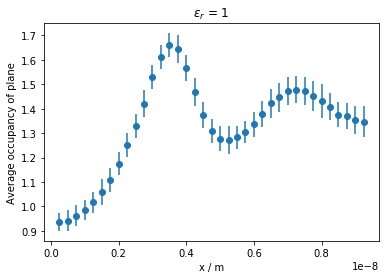

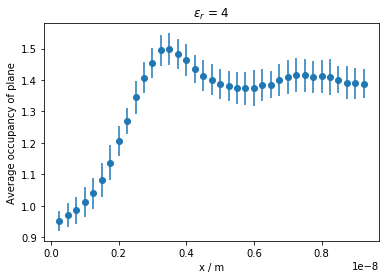

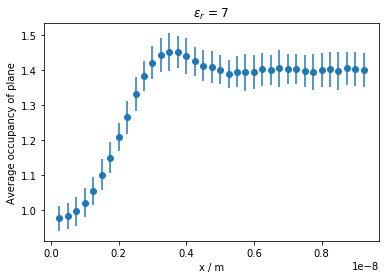

In [5]:
# Read in data for permittivities 1, 4, 7

for h, g in enumerate([1,4,7]):
    distri = np.zeros((37,60))

    for j in range(10):
        
        # Some calculations were completed in two halves hence the averaging  
        
        path = "./simulation_data/27_11_20/charges_105/perm_{}/calc_{}/average_occupancy_mean.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,2 * j] = distribution_data[38:] 
        distri[:,2 * j + 1] = np.flip(distribution_data[:37])
        
        all_105_paths["permittivity_{}".format(g)].append(path)
        
        
        path = "./simulation_data/07_12_20/charges_105/perm_{}/calc_{}/average_occupancy_mean.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,20 + 2 * j] = distribution_data[38:] 
        distri[:,20 + 2 * j + 1] = np.flip(distribution_data[:37]) 
        
        all_105_paths["permittivity_{}".format(g)].append(path)

    for j in range(5):

        path = "./simulation_data/24_12_20/charges_105/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,40 + 2 * j] = distribution_data[38:]
        distri[:,40 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_105_paths["permittivity_{}".format(g)].append(path)


        path = "./simulation_data/25_12_20/charges_105/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,50 + 2 * j] = distribution_data[38:]
        distri[:,50 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_105_paths["permittivity_{}".format(g)].append(path)
        

    # Calculate the average
    
    distributions = np.mean(distri, axis = 1 )
    
    all_105_distributions[:,h] = distributions

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distri[k,:])  
        
        
    all_105_errors_se[:,h] = err / np.sqrt(60)
    all_105_errors_sd[:,h] = err 


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distributions, err, fmt="o") # error bars are standard deviations
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(g))
    
    # Uncomment the below out if you wish to view all the individual simulations
#     for i in range(60):
#         plt.plot(x, distri[:,i], '-')

    plt.show()
    

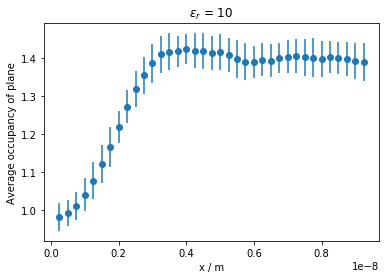

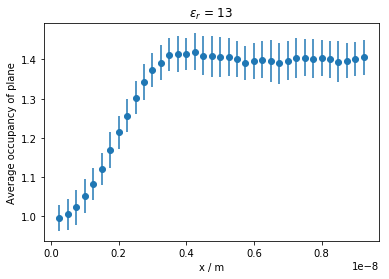

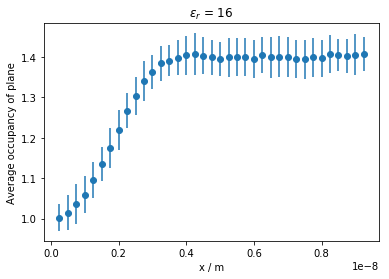

In [6]:
# Read in data for permittivities 10, 13, 16

for h, g in enumerate([10,13,16]):
    distri = np.zeros((37,100))

    for j in range(10):
        
        # Some calculations were completed in two halves hence the averaging  
        
        path = "./simulation_data/27_11_20/charges_105/perm_{}/calc_{}/average_occupancy_mean.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,2 * j] = distribution_data[38:] 
        distri[:,2 * j + 1] = np.flip(distribution_data[:37])
        
        all_105_paths["permittivity_{}".format(g)].append(path)
        
        
        path = "./simulation_data/07_12_20/charges_105/perm_{}/calc_{}/average_occupancy_mean.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,20 + 2 * j] = distribution_data[38:] 
        distri[:,20 + 2 * j + 1] = np.flip(distribution_data[:37]) 
        
        all_105_paths["permittivity_{}".format(g)].append(path)

    for j in range(5):

        path = "./simulation_data/24_12_20/charges_105/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,40 + 2 * j] = distribution_data[38:]
        distri[:,40 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_105_paths["permittivity_{}".format(g)].append(path)


        path = "./simulation_data/25_12_20/charges_105/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,50 + 2 * j] = distribution_data[38:]
        distri[:,50 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_105_paths["permittivity_{}".format(g)].append(path)
        
    for j in range(20):

        path = "./simulation_data/18_03_21/charges_105/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,60 + 2 * j] = distribution_data[38:]
        distri[:,60 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_105_paths["permittivity_{}".format(g)].append(path)
        
        

    # Calculate the average
    
    distributions = np.mean(distri, axis = 1 )
    
    all_105_distributions[:,h+3] = distributions

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distri[k,:])  
        
        
    all_105_errors_se[:,3+h] = err / np.sqrt(100)
    all_105_errors_sd[:,3+h] = err 


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distributions, err, fmt="o") # error bars are standard deviations
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(g))
    
    # Uncomment the below out if you wish to view all the individual simulations
#     for i in range(100):
#         plt.plot(x, distri[:,i], '-')

    plt.show()
    

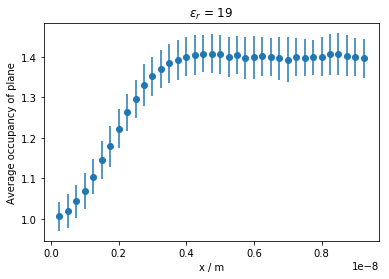

In [7]:
# Read in data for permittivity 19

for h, g in enumerate([19]):
    distri = np.zeros((37,140))

    for j in range(10):
        path = "./simulation_data/27_11_20/charges_105/perm_{}/calc_{}/average_occupancy_mean.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,2 * j] = distribution_data[38:]
        distri[:,2 * j + 1] = np.flip(distribution_data[:37])
        
        all_105_paths["permittivity_{}".format(g)].append(path)
        

        path = "./simulation_data/07_12_20/charges_105/perm_{}/calc_{}/average_occupancy_mean.json".format(g,j)

        distribution_data = format_distribution(path)
        
        all_105_paths["permittivity_{}".format(g)].append(path)


        distri[:,20 + 2 * j] = distribution_data[38:]
        distri[:,20 + 2 * j + 1] = np.flip(distribution_data[:37]) 

    for j in range(5):

        path = "./simulation_data/24_12_20/charges_105/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,40 + 2 * j] = distribution_data[38:]
        distri[:,40 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_105_paths["permittivity_{}".format(g)].append(path)

        path = "./simulation_data/25_12_20/charges_105/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,50 + 2 * j] = distribution_data[38:]
        distri[:,50 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_105_paths["permittivity_{}".format(g)].append(path)
        
    for j in range(20):

        path = "./simulation_data/05_01_21/charges_105/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,60 + 2 * j] = distribution_data[38:]
        distri[:,60 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_105_paths["permittivity_{}".format(g)].append(path)
        
    for j in range(20):

        path = "./simulation_data/18_03_21/charges_105/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,100 + 2 * j] = distribution_data[38:]
        distri[:,100 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_105_paths["permittivity_{}".format(g)].append(path)

    distributions = np.mean(distri, axis = 1 )
    
    all_105_distributions[:,h+6] = distributions

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distri[k,:])  
        
    all_105_errors_se[:,h+6] = err / np.sqrt(140)
    all_105_errors_sd[:,h+6] = err 


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distributions, err, fmt="o") # error bars are standard deviations
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(g))
    
    # Uncomment the below out if you wish to view all the individual simulations
#     for i in range(140):
#         plt.plot(x, distri[:,i], '-')
        
    plt.show()

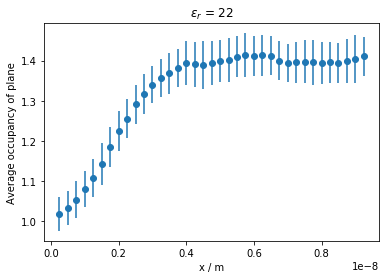

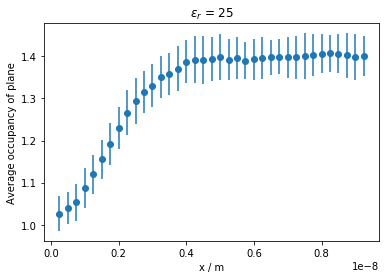

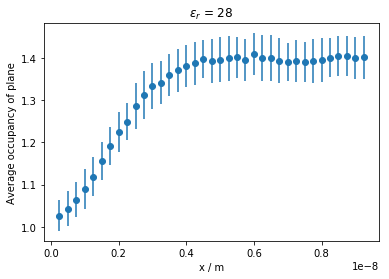

In [8]:
# Read in data for permittivities  22, 25, and 28.

for h, g in enumerate([22,25,28]):
    distri = np.zeros((37,100))

    for j in range(10):
        path = "./simulation_data/27_11_20/charges_105/perm_{}/calc_{}/average_occupancy_mean.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,2 * j] = distribution_data[38:]
        distri[:,2 * j + 1] = np.flip(distribution_data[:37])
        
        all_105_paths["permittivity_{}".format(g)].append(path)
        

        path = "./simulation_data/07_12_20/charges_105/perm_{}/calc_{}/average_occupancy_mean.json".format(g,j)

        distribution_data = format_distribution(path)
        
        all_105_paths["permittivity_{}".format(g)].append(path)


        distri[:,20 + 2 * j] = distribution_data[38:]
        distri[:,20 + 2 * j + 1] = np.flip(distribution_data[:37]) 

    for j in range(5):

        path = "./simulation_data/24_12_20/charges_105/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,40 + 2 * j] = distribution_data[38:]
        distri[:,40 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_105_paths["permittivity_{}".format(g)].append(path)

        path = "./simulation_data/25_12_20/charges_105/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,50 + 2 * j] = distribution_data[38:]
        distri[:,50 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_105_paths["permittivity_{}".format(g)].append(path)
        
    for j in range(20):

        path = "./simulation_data/05_01_21/charges_105/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,60 + 2 * j] = distribution_data[38:]
        distri[:,60 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_105_paths["permittivity_{}".format(g)].append(path)

    distributions = np.mean(distri, axis = 1 )
    
    all_105_distributions[:,h+7] = distributions

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distri[k,:])  
        
    all_105_errors_se[:,h+7] = err / np.sqrt(100)
    all_105_errors_sd[:,h+7] = err 


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distributions, err, fmt="o") # error bars are standard deviations
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(g))
    
    # Uncomment the below out if you wish to view all the individual simulations
#     for i in range(100):
#         plt.plot(x, distri[:,i], '-')
        
    plt.show()

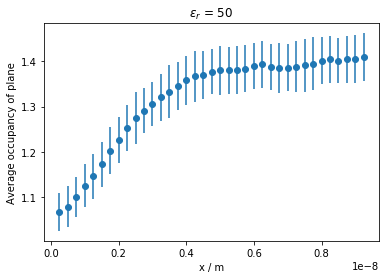

In [9]:
# Read in data for permittivity = 50

distri = np.zeros((37,150))

for j in range(50):
    path = "./simulation_data/08_12_20/charges_105/perm_50/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri[:,2 * j] = distribution_data[38:]
    distri[:,2 * j + 1] = np.flip(distribution_data[:37])
    
    all_105_paths["permittivity_{}".format(50)].append(path)
    
for j in range(25):
    path = "./simulation_data/24_02_21/charges_105/perm_50/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri[:,100+2 * j] = distribution_data[38:]
    distri[:,100+2 * j + 1] = np.flip(distribution_data[:37])
    
    all_105_paths["permittivity_{}".format(50)].append(path)
    


distributions = np.mean(distri, axis = 1 )

err = np.zeros(37)

for k in range(37):
    err[k] = np.std(distri[k,:])  
    
all_105_distributions[:,10] = distributions
all_105_errors_se[:,10] = err / np.sqrt(150)
all_105_errors_sd[:,10] = err 


x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions, err, fmt="o")# error bars are standard deviations
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(50))
# Uncomment the below out if you wish to view all the individual simulations
# for i in range(100):
#     plt.plot(x, distri[:,i], '-')

plt.show()

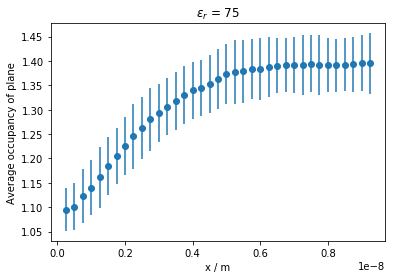

In [10]:
# Read in data for permittivity = 75

distri = np.zeros((37,150))

for j in range(50):
    path = "./simulation_data/08_12_20/charges_105/perm_75/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri[:,2 * j] = distribution_data[38:]
    distri[:,2 * j + 1] = np.flip(distribution_data[:37])
    
    all_105_paths["permittivity_{}".format(75)].append(path)
    
for j in range(25):
    path = "./simulation_data/24_02_21/charges_105/perm_75/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri[:,100+2 * j] = distribution_data[38:]
    distri[:,100+2 * j + 1] = np.flip(distribution_data[:37])
    
    all_105_paths["permittivity_{}".format(75)].append(path)
    

distributions = np.mean(distri, axis = 1 )

err = np.zeros(37)

for k in range(37):
    err[k] = np.std(distri[k,:])  
    
all_105_distributions[:,11] = distributions
all_105_errors_se[:,11] = err / np.sqrt(150)
all_105_errors_sd[:,11] = err 


x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions, err, fmt="o") # error bars are standard deviations
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(75))
# Uncomment the below out if you wish to view all the individual simulations
# for i in range(100):
#     plt.plot(x, distri[:,i], '-')

plt.show()

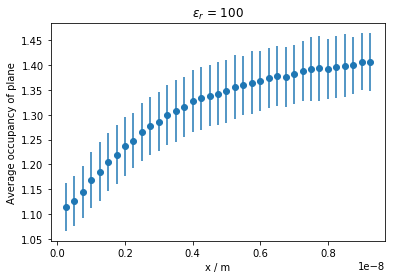

In [11]:
# Read in data for permittivity = 100. 

distri = np.zeros((37,200))

for j in range(40):
    path = "./simulation_data/04_12_20/04_12_20_S/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri[:,2 * j] = distribution_data[38:]
    distri[:,2 * j + 1] = np.flip(distribution_data[:37])
    
    all_105_paths["permittivity_{}".format(100)].append(path)
    
for j in range(40):
    path = "./simulation_data/04_12_20/04_12_20_for/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri[:,80 + 2 * j] = distribution_data[38:]
    distri[:,80 + 2 * j + 1] = np.flip(distribution_data[:37])
    
    all_105_paths["permittivity_{}".format(100)].append(path)
    
for j in range(20):
    path = "./simulation_data/04_12_20/04_12_20_J/calc_{}/average_occupancy.json".format(40+j)

    distribution_data = format_distribution(path)

    distri[:,160 + 2 * j] = distribution_data[38:]
    distri[:,160 + 2 * j + 1] = np.flip(distribution_data[:37])
    
    all_105_paths["permittivity_{}".format(100)].append(path)



distributions = np.mean(distri, axis = 1 )

err = np.zeros(37)

for k in range(37):
    err[k] = np.std(distri[k,:])  

all_105_distributions[:,12] = distributions
all_105_errors_se[:,12] = err / np.sqrt(200)
all_105_errors_sd[:,12] = err 

x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions, err, fmt="o") # error bars are standard deviations 
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(100))

# Uncomment the below out if you wish to view all the individual simulations
# for i in range(200):
#     plt.plot(x, distri[:,i], '-')

plt.show()

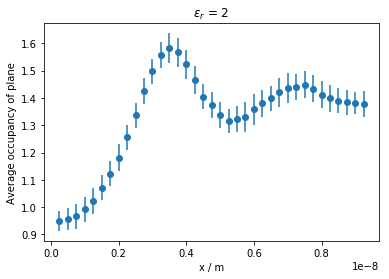

In [12]:
# Read in data for permittivitiy 2

distri = np.zeros((37,60))

for j in range(30):
    path = "./simulation_data/13_01_21/charges_105/perm_2/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri[:,2 * j] = distribution_data[38:]
    distri[:,2 * j + 1] = np.flip(distribution_data[:37])
    
    all_105_paths["permittivity_{}".format(2)].append(path)



distributions = np.mean(distri, axis = 1 )

err = np.zeros(37)

for k in range(37):
    err[k] = np.std(distri[k,:])  

all_105_distributions[:,13] = distributions
all_105_errors_se[:,13] = err / np.sqrt(60)
all_105_errors_sd[:,13] = err 


x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions, err,fmt="o") # error bars are standard deviations 
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(2))

# Uncomment the below out if you wish to view all the individual simulations
# for i in range(60):
#     plt.plot(x, distri[:,i], '-')

plt.show()


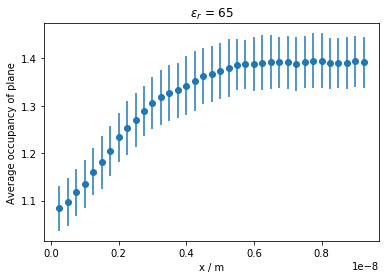

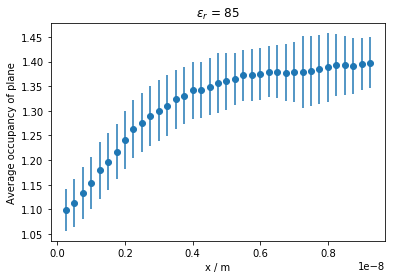

In [13]:
for h, g in enumerate([65,85]):
    distri = np.zeros((37,150))

    for j in range(75):
        path = "/Users/jmd80/data_analysis_kmc/16_03_21/charges_105/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,2 * j] = distribution_data[38:]
        distri[:,2 * j + 1] = np.flip(distribution_data[:37])
        all_105_paths["permittivity_{}".format(g)].append(path)
        
    
    distributions = np.mean(distri, axis = 1 )

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distri[k,:])  
        
    all_105_distributions[:,14+h] = distributions
    all_105_errors_se[:,14+h] = err / np.sqrt(60)
    all_105_errors_sd[:,14+h] = err 


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distributions, err, fmt="o")
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(g))
    
    # Uncomment the below out if you wish to view all the individual simulations
#     for i in range(150):
#         plt.plot(x, distri[:,i], '-')
    plt.show()


In [14]:
for i in [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 50, 75, 100, 2, 65, 85]:
    print(len(all_105_paths["permittivity_{}".format(i)]))

30
30
30
50
50
50
70
50
50
50
75
75
100
30
75
75


In [15]:
# Create a json containing the distributions and errors.

permittivities = [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 50, 75, 100, 2, 65, 85]

data_dictionary = {}

for i in range(14):
    data_dictionary["distribution_{}".format(permittivities[i])] = list(all_105_distributions[:,i])
    data_dictionary["standard_deviations_{}".format(permittivities[i])] = list(all_105_errors_sd[:,i])
    data_dictionary["standard_errors_{}".format(permittivities[i])] = list(all_105_errors_se[:,i])
    
# with open('105_charges_distributions_errors.json', 'w') as outfile:
#     json.dump(data_dictionary, outfile)

In [16]:
with open("105_charges_paths.json", 'w') as data:
    json.dump(all_105_paths, data)

### Create json for systems with 210 charges

In [17]:
# Same approach as 105 charges

all_210_distributions = np.zeros((37,14))
all_210_errors_se = np.zeros((37,14))
all_210_errors_sd = np.zeros((37,14))

In [18]:
all_210_paths = {}

for p in [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 50, 75, 100, 2]:
    all_210_paths["permittivity_{}".format(p)] = []

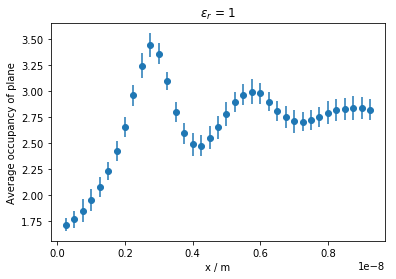

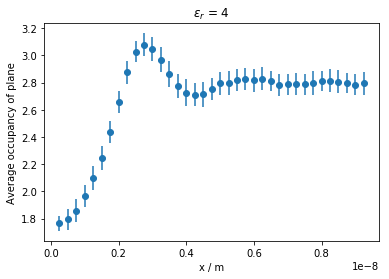

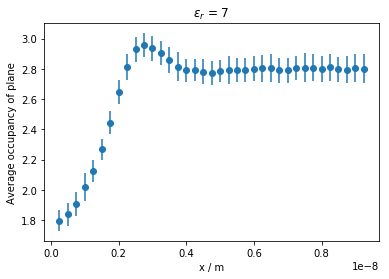

In [19]:
# Read in data for permittivities 1, 4, 7, 10, 13, and 16. 

for h, g in enumerate([1,4,7]):
    distri = np.zeros((37,60))

    for j in range(10):
        path = "./simulation_data/27_11_20/charges_210/perm_{}/calc_{}/average_occupancy_mean.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,2 * j] =  distribution_data[38:]
        distri[:,2 * j + 1] = np.flip(distribution_data[:37])
        
        all_210_paths["permittivity_{}".format(g)].append(path)

        
        path = "./simulation_data/07_12_20/charges_210/perm_{}/calc_{}/average_occupancy_mean.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,20 + 2 * j] =  distribution_data[38:] 
        distri[:,20 + 2 * j + 1] = np.flip(distribution_data[:37]) 
        
        all_210_paths["permittivity_{}".format(g)].append(path)
        

    for j in range(5):

        path = "./simulation_data/24_12_20/charges_210/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)
        

        distri[:,40 + 2 * j] = distribution_data[38:]
        distri[:,40 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_210_paths["permittivity_{}".format(g)].append(path)

        path = "./simulation_data/25_12_20/charges_210/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = format_distribution(path)
        
        all_210_paths["permittivity_{}".format(g)].append(path)

        distri[:,50 + 2 * j] = distribution_data[38:]
        distri[:,50 + 2 * j + 1] = np.flip(distribution_data[:37])


    distributions = np.mean(distri, axis = 1 )
    
    all_210_distributions[:,h] = distributions

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distri[k,:])  
        
    all_210_errors_se[:,h] = err / np.sqrt(60)
    all_210_errors_sd[:,h] = err 


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distributions, err, fmt="o") # error bars are standard deviations 
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(g))
    
    # Uncomment the below out if you wish to view all the individual simulations
#     for i in range(60):
#         plt.plot(x, distri[:,i], '-')
    plt.show()

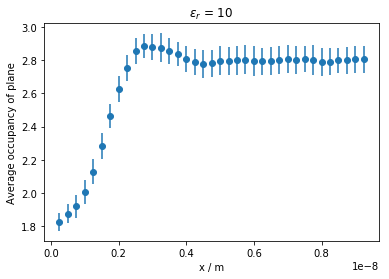

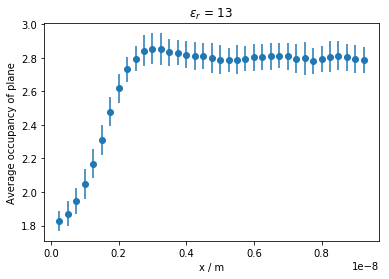

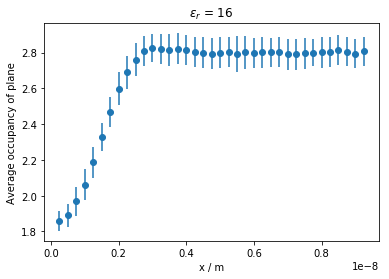

In [20]:
for h, g in enumerate([10, 13, 16]):
    distri = np.zeros((37,100))

    for j in range(10):
        path = "./simulation_data/27_11_20/charges_210/perm_{}/calc_{}/average_occupancy_mean.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,2 * j] =  distribution_data[38:]
        distri[:,2 * j + 1] = np.flip(distribution_data[:37])
        
        all_210_paths["permittivity_{}".format(g)].append(path)

        
        path = "./simulation_data/07_12_20/charges_210/perm_{}/calc_{}/average_occupancy_mean.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,20 + 2 * j] =  distribution_data[38:] 
        distri[:,20 + 2 * j + 1] = np.flip(distribution_data[:37]) 
        
        all_210_paths["permittivity_{}".format(g)].append(path)
        

    for j in range(5):

        path = "./simulation_data/24_12_20/charges_210/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)
        

        distri[:,40 + 2 * j] = distribution_data[38:]
        distri[:,40 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_210_paths["permittivity_{}".format(g)].append(path)

        path = "./simulation_data/25_12_20/charges_210/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = format_distribution(path)
        
        all_210_paths["permittivity_{}".format(g)].append(path)

        distri[:,50 + 2 * j] = distribution_data[38:]
        distri[:,50 + 2 * j + 1] = np.flip(distribution_data[:37])
        
    for j in range(20):

        path = "./simulation_data/18_03_21/charges_210/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)
        

        distri[:,60 + 2 * j] = distribution_data[38:]
        distri[:,60 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_210_paths["permittivity_{}".format(g)].append(path)


    distributions = np.mean(distri, axis = 1 )
    
    all_210_distributions[:,h+3] = distributions

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distri[k,:])  
        
    all_210_errors_se[:,3+h] = err / np.sqrt(100)
    all_210_errors_sd[:,3+h] = err 


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distributions, err, fmt="o") # error bars are standard deviations 
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(g))
    
    # Uncomment the below out if you wish to view all the individual simulations
#     for i in range(100):
#         plt.plot(x, distri[:,i], '-')
    plt.show()

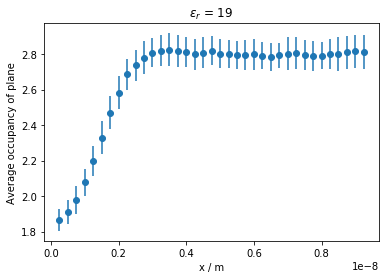

In [21]:
for h, g in enumerate([19]):
    distri = np.zeros((37,140))

    for j in range(10):
        path = "./simulation_data/27_11_20/charges_210/perm_{}/calc_{}/average_occupancy_mean.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,2 * j] = distribution_data[38:]
        distri[:,2 * j + 1] = np.flip(distribution_data[:37])
        
        all_210_paths["permittivity_{}".format(g)].append(path)
        
        path = "./simulation_data/07_12_20/charges_210/perm_{}/calc_{}/average_occupancy_mean.json".format(g,j)

        distribution_data =format_distribution(path)

        distri[:,20 + 2 * j] = distribution_data[38:] 
        distri[:,20 + 2 * j + 1] =np.flip(distribution_data[:37]) 
        
        all_210_paths["permittivity_{}".format(g)].append(path)
        

    for j in range(5):

        path = "./simulation_data/24_12_20/charges_210/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,40 + 2 * j] = distribution_data[38:]
        distri[:,40 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        
        all_210_paths["permittivity_{}".format(g)].append(path)

        path = "./simulation_data/25_12_20/charges_210/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,50 + 2 * j] = distribution_data[38:]
        distri[:,50 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_210_paths["permittivity_{}".format(g)].append(path)
        
    for j in range(20):

        path = "./simulation_data/06_01_21/charges_210/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,60 + 2 * j] = distribution_data[38:]
        distri[:,60 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_210_paths["permittivity_{}".format(g)].append(path)
        
    for j in range(20):

        path = "./simulation_data/18_03_21/charges_210/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,100 + 2 * j] = distribution_data[38:]
        distri[:,100 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_210_paths["permittivity_{}".format(g)].append(path)

        

    distributions = np.mean(distri, axis = 1 )
    
    all_210_distributions[:,h+6] = distributions

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distri[k,:])  
        
    all_210_errors_se[:,h+6] = err / np.sqrt(140)
    all_210_errors_sd[:,h+6] = err 


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distributions, err, fmt="o") # error bars are standard deviations 
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(g))
    
    # Uncomment the below out if you wish to view all the individual simulations
#     for i in range(140):
#         plt.plot(x, distri[:,i], '-')

    plt.show()

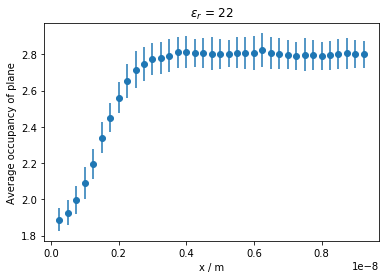

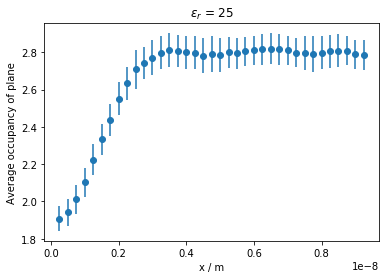

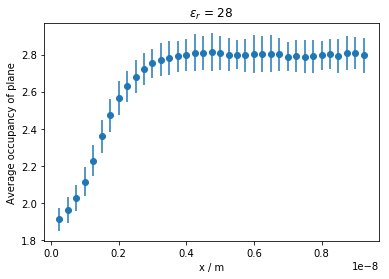

In [22]:
# Read in data for permittivities  22, 25, and 28. 

for h, g in enumerate([22,25,28]):
    distri = np.zeros((37,100))

    for j in range(10):
        path = "./simulation_data/27_11_20/charges_210/perm_{}/calc_{}/average_occupancy_mean.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,2 * j] = distribution_data[38:]
        distri[:,2 * j + 1] = np.flip(distribution_data[:37])
        
        all_210_paths["permittivity_{}".format(g)].append(path)
        
        path = "./simulation_data/07_12_20/charges_210/perm_{}/calc_{}/average_occupancy_mean.json".format(g,j)

        distribution_data =format_distribution(path)

        distri[:,20 + 2 * j] = distribution_data[38:] 
        distri[:,20 + 2 * j + 1] =np.flip(distribution_data[:37]) 
        
        all_210_paths["permittivity_{}".format(g)].append(path)
        

    for j in range(5):

        path = "./simulation_data/24_12_20/charges_210/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,40 + 2 * j] = distribution_data[38:]
        distri[:,40 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        
        all_210_paths["permittivity_{}".format(g)].append(path)

        path = "./simulation_data/25_12_20/charges_210/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,50 + 2 * j] = distribution_data[38:]
        distri[:,50 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_210_paths["permittivity_{}".format(g)].append(path)
        
    for j in range(20):

        path = "./simulation_data/06_01_21/charges_210/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,60 + 2 * j] = distribution_data[38:]
        distri[:,60 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_210_paths["permittivity_{}".format(g)].append(path)

        

    distributions = np.mean(distri, axis = 1 )
    
    all_210_distributions[:,h+7] = distributions

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distri[k,:])  
        
    all_210_errors_se[:,h+7] = err / np.sqrt(100)
    all_210_errors_sd[:,h+7] = err 


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distributions, err, fmt="o") # error bars are standard deviations 
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(g))
    
    # Uncomment the below out if you wish to view all the individual simulations
#     for i in range(100):
#         plt.plot(x, distri[:,i], '-')

    plt.show()

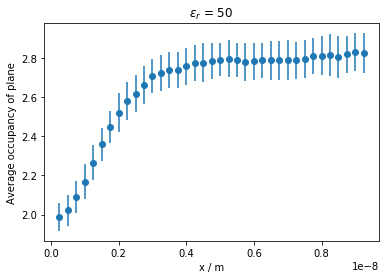

In [23]:
# Read in data for permittivity 50. 

distri = np.zeros((37,100))

for j in range(50):
    path = "./simulation_data/07_12_20_S_results/perms_50_75/charges_210/perm_50/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri[:,2 * j] = distribution_data[38:]
    distri[:,2 * j + 1] = np.flip(distribution_data[:37])
    
    all_210_paths["permittivity_{}".format(50)].append(path)


distributions = np.mean(distri, axis = 1 )

all_210_distributions[:,10] = distributions

err = np.zeros(37)

for k in range(37):
    err[k] = np.std(distri[k,:])  

all_210_errors_se[:,10] = err / np.sqrt(100)
all_210_errors_sd[:,10] = err 


x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions, err, fmt="o") # error bars are standard deviations 
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(50))


# Uncomment the below out if you wish to view all the individual simulations
# for i in range(100):
#     plt.plot(x, distri[:,i], '-')

plt.show()

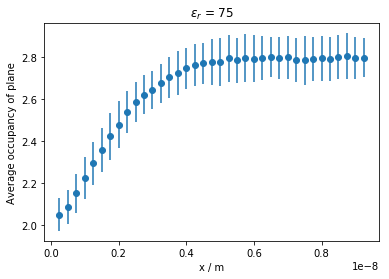

In [24]:
# Read in data for permittivity 75. 

distri = np.zeros((37,98))

for j in range(50):
    
    # Simulation 13 failed. 
    if j != 13 and j != 49:
        path = "./simulation_data/07_12_20_S_results/perms_50_75/charges_210/perm_75/calc_{}/average_occupancy.json".format(j)

        distribution_data = format_distribution(path)

        distri[:,2 * j] = distribution_data[38:]
        distri[:,2 * j + 1] = np.flip(distribution_data[:37])
        
        all_210_paths["permittivity_{}".format(75)].append(path)

    if j == 49:
        path = "./simulation_data/07_12_20_S_results/perms_50_75/charges_210/perm_75/calc_{}/average_occupancy.json".format(j)
        
        all_210_paths["permittivity_{}".format(75)].append(path)

        distribution_data = format_distribution(path)

        distri[:,2 * 13] = distribution_data[38:]
        distri[:,2 * 13 + 1] = np.flip(distribution_data[:37])


distributions = np.mean(distri, axis = 1 )

all_210_distributions[:,11] = distributions

err = np.zeros(37)

for k in range(37):
    err[k] = np.std(distri[k,:])  

all_210_errors_se[:,11] = err / np.sqrt(98)
all_210_errors_sd[:,11] = err 


x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions, err, fmt="o") # error bars are standard deviations 
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(75))

# Uncomment the below out if you wish to view all the individual simulations
# for i in range(98):
#     plt.plot(x, distri[:,i], '-')

plt.show()

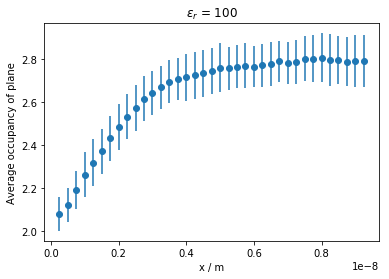

In [25]:
# Read in data for permittivity 100. 

distri = np.zeros((37,160))

for j in range(80):
    path = "./simulation_data/09_12_20/charges_210/perm_100/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri[:,2 * j] = distribution_data[38:]
    distri[:,2 * j + 1] = np.flip(distribution_data[:37])
    
    all_210_paths["permittivity_{}".format(100)].append(path)


distributions = np.mean(distri, axis = 1 )

all_210_distributions[:,12] = distributions

err = np.zeros(37)

for k in range(37):
    err[k] = np.std(distri[k,:])  

all_210_errors_se[:,12] = err / np.sqrt(160)
all_210_errors_sd[:,12] = err 


x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions, err, fmt="o") # error bars are standard deviations 
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(100))

# Uncomment the below out if you wish to view all the individual simulations
# for i in range(160):
#     plt.plot(x, distri[:,i], '-')

plt.show()

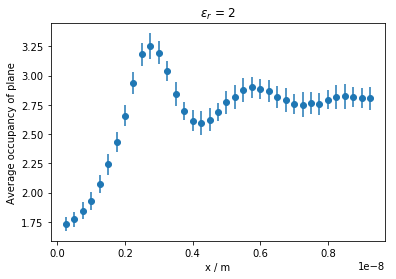

In [26]:
distri = np.zeros((37,60))

for j in range(30):
    path = "./simulation_data/13_01_21/charges_210/perm_2/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri[:,2 * j] = distribution_data[38:]
    distri[:,2 * j + 1] = np.flip(distribution_data[:37])
    
    all_210_paths["permittivity_{}".format(2)].append(path)



distribution = np.mean(distri, axis = 1 )

all_210_distributions[:,13] = distribution

err = np.zeros(37)

for k in range(37):
    err[k] = np.std(distri[k,:])  

all_210_errors_se[:,13] = err / np.sqrt(60)
all_210_errors_sd[:,13] = err 


x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distribution, err,fmt="o") # error bars are standard deviations 
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(2))

# Uncomment the below out if you wish to view all the individual simulations
# for i in range(60):
#     plt.plot(x, distri[:,i], '-')
plt.show()


In [27]:
for i in [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 50, 75, 100, 2]:
    print(len(all_210_paths["permittivity_{}".format(i)]))

30
30
30
50
50
50
70
50
50
50
50
49
80
30


In [28]:
# Create json containing distributions and errors

permittivities = [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 50, 75, 100, 2]

data_dictionary = {}

for i in range(14):
    data_dictionary["distribution_{}".format(permittivities[i])] = list(all_210_distributions[:,i])
    data_dictionary["standard_deviations_{}".format(permittivities[i])] = list(all_210_errors_sd[:,i])
    data_dictionary["standard_errors_{}".format(permittivities[i])] = list(all_210_errors_se[:,i])
    
# with open('210_charges_distributions_errors.json', 'w') as outfile:
#     json.dump(data_dictionary, outfile)

In [29]:
with open("210_charges_paths.json", 'w') as data:
    json.dump(all_210_paths, data)

### Create json for systems with 421 charges

In [30]:
all_421_distributions = np.zeros((37,14))
all_421_errors_se = np.zeros((37,14))
all_421_errors_sd = np.zeros((37,14))

In [31]:
all_421_paths = {}

for p in [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 50, 75, 100, 2]:
    all_421_paths["permittivity_{}".format(p)] = []

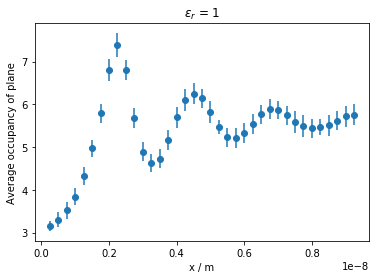

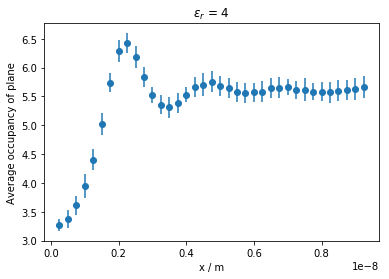

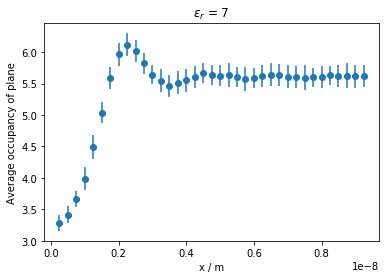

In [32]:
# Read in data for permittivities 1, 4, 7, 10, 13, and 16. 

for h, g in enumerate([1,4,7]):
    distri = np.zeros((37,60))

    for j in range(10):
        path = "./simulation_data/27_11_20_S/charges_421/perm_{}/calc_{}/average_occupancy_mean.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,2 * j] = distribution_data[38:] 
        distri[:,2 * j + 1] = np.flip(distribution_data[:37])     
        
        all_421_paths["permittivity_{}".format(g)].append(path)
        
        path = "./simulation_data/07_12_20/charges_421/perm_{}/calc_{}/average_occupancy_mean.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,20 + 2 * j] = distribution_data[38:] 
        distri[:,20 + 2 * j + 1] = np.flip(distribution_data[:37]) 
        
        all_421_paths["permittivity_{}".format(g)].append(path)
        

    for j in range(5):

        path = "./simulation_data/24_12_20/charges_421/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,40 + 2 * j] = distribution_data[38:]
        distri[:,40 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_421_paths["permittivity_{}".format(g)].append(path)

        path = "./simulation_data/25_12_20/charges_421/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,50 + 2 * j] = distribution_data[38:]
        distri[:,50 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_421_paths["permittivity_{}".format(g)].append(path)
        
    distributions = np.mean(distri, axis = 1 )
    
    all_421_distributions[:,h] = distributions

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distri[k,:])  
        
    all_421_errors_se[:,h] = err / np.sqrt(60)
    all_421_errors_sd[:,h] = err 


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distributions, err, fmt="o") # error bars are standard deviations 
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(g))
    
    # Uncomment the below out if you wish to view all the individual simulations
#     for i in range(60):
#         plt.plot(x, distri[:,i], '-')

    plt.show()

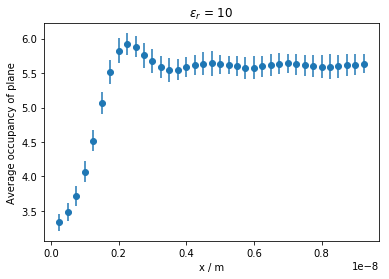

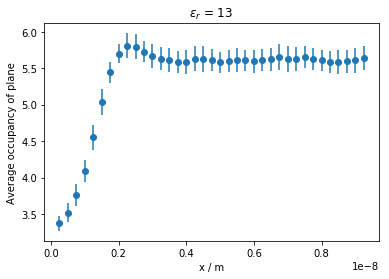

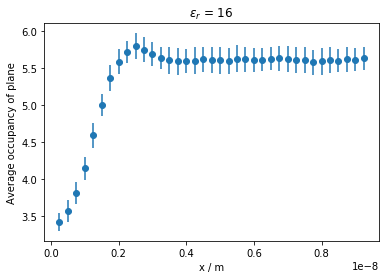

In [33]:
for h, g in enumerate([10, 13, 16]):
    distri = np.zeros((37,100))

    for j in range(10):
        path = "./simulation_data/27_11_20_S/charges_421/perm_{}/calc_{}/average_occupancy_mean.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,2 * j] = distribution_data[38:] 
        distri[:,2 * j + 1] = np.flip(distribution_data[:37])     
        
        all_421_paths["permittivity_{}".format(g)].append(path)
        
        path = "./simulation_data/07_12_20/charges_421/perm_{}/calc_{}/average_occupancy_mean.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,20 + 2 * j] = distribution_data[38:] 
        distri[:,20 + 2 * j + 1] = np.flip(distribution_data[:37]) 
        
        all_421_paths["permittivity_{}".format(g)].append(path)
        

    for j in range(5):

        path = "./simulation_data/24_12_20/charges_421/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,40 + 2 * j] = distribution_data[38:]
        distri[:,40 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_421_paths["permittivity_{}".format(g)].append(path)

        path = "./simulation_data/25_12_20/charges_421/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,50 + 2 * j] = distribution_data[38:]
        distri[:,50 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_421_paths["permittivity_{}".format(g)].append(path)
        
    for j in range(20):

        path = "./simulation_data/18_03_21/charges_421/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)
        

        distri[:,60 + 2 * j] = distribution_data[38:]
        distri[:,60 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_421_paths["permittivity_{}".format(g)].append(path)
        
    distributions = np.mean(distri, axis = 1 )
    
    all_421_distributions[:,h] = distributions

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distri[k,:])  
        
    all_421_errors_se[:,h] = err / np.sqrt(60)
    all_421_errors_sd[:,h] = err 


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distributions, err, fmt="o") # error bars are standard deviations 
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(g))
    
    # Uncomment the below out if you wish to view all the individual simulations
#     for i in range(60):
#         plt.plot(x, distri[:,i], '-')

    plt.show()

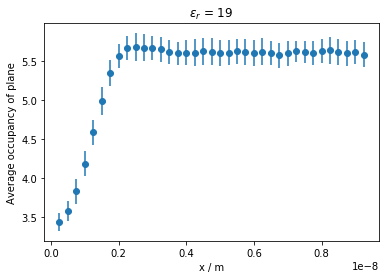

In [34]:
for h, g in enumerate([19]):
    distri = np.zeros((37,140))

    for j in range(10):
        path = "./simulation_data/27_11_20_S/charges_421/perm_{}/calc_{}/average_occupancy_mean.json".format(g,j)

        distribution_data = format_distribution(path)


        distri[:,2 * j] = distribution_data[38:] 
        distri[:,2 * j + 1] = np.flip(distribution_data[:37])
        
        all_421_paths["permittivity_{}".format(g)].append(path)

        
        path = "./simulation_data/07_12_20/charges_421/perm_{}/calc_{}/average_occupancy_mean.json".format(g,j)

        distribution_data = format_distribution(path)


        distri[:,20 + 2 * j] = distribution_data[38:] 
        distri[:,20 + 2 * j + 1] = np.flip(distribution_data[:37]) 
        
        all_421_paths["permittivity_{}".format(g)].append(path)
        

    for j in range(5):

        path = "./simulation_data/24_12_20/charges_421/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,40 + 2 * j] = distribution_data[38:]
        distri[:,40 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_421_paths["permittivity_{}".format(g)].append(path)

        path = "./simulation_data/25_12_20/charges_421/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,50 + 2 * j] = distribution_data[38:]
        distri[:,50 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_421_paths["permittivity_{}".format(g)].append(path)
        
    for j in range(20):

        path = "./simulation_data/06_01_21/charges_421/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,60 + 2 * j] = distribution_data[38:]
        distri[:,60 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_421_paths["permittivity_{}".format(g)].append(path)
        
    for j in range(20):

        path = "./simulation_data/18_03_21/charges_421/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)
        

        distri[:,100 + 2 * j] = distribution_data[38:]
        distri[:,100 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_421_paths["permittivity_{}".format(g)].append(path)


    distributions = np.mean(distri, axis = 1 )
    
    all_421_distributions[:,h+6] = distributions

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distri[k,:])  
        
    all_421_errors_se[:,h+6] = err / np.sqrt(100)
    all_421_errors_sd[:,h+6] = err 


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distributions, err, fmt="o") # error bars are standard deviations 
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(g))
    
    # Uncomment the below out if you wish to view all the individual simulations
#     for i in range(100):
#         plt.plot(x, distri[:,i], '-')

    plt.show()

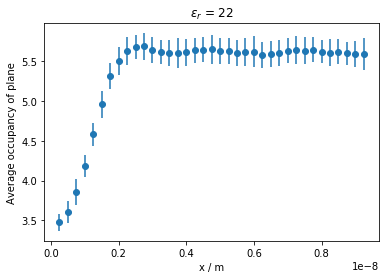

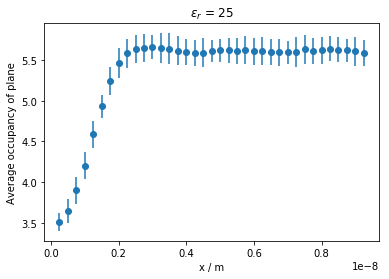

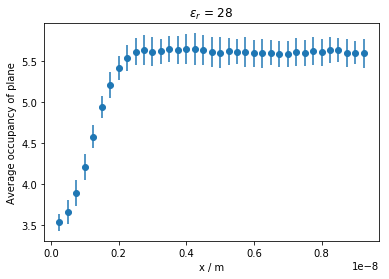

In [35]:
for h, g in enumerate([22,25,28]):
    distri = np.zeros((37,100))

    for j in range(10):
        path = "./simulation_data/27_11_20_S/charges_421/perm_{}/calc_{}/average_occupancy_mean.json".format(g,j)

        distribution_data = format_distribution(path)


        distri[:,2 * j] = distribution_data[38:] 
        distri[:,2 * j + 1] = np.flip(distribution_data[:37])
        
        all_421_paths["permittivity_{}".format(g)].append(path)

        
        path = "./simulation_data/07_12_20/charges_421/perm_{}/calc_{}/average_occupancy_mean.json".format(g,j)

        distribution_data = format_distribution(path)


        distri[:,20 + 2 * j] = distribution_data[38:] 
        distri[:,20 + 2 * j + 1] = np.flip(distribution_data[:37]) 
        
        all_421_paths["permittivity_{}".format(g)].append(path)
        

    for j in range(5):

        path = "./simulation_data/24_12_20/charges_421/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,40 + 2 * j] = distribution_data[38:]
        distri[:,40 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_421_paths["permittivity_{}".format(g)].append(path)

        path = "./simulation_data/25_12_20/charges_421/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,50 + 2 * j] = distribution_data[38:]
        distri[:,50 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_421_paths["permittivity_{}".format(g)].append(path)
        
    for j in range(20):

        path = "./simulation_data/06_01_21/charges_421/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,60 + 2 * j] = distribution_data[38:]
        distri[:,60 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_421_paths["permittivity_{}".format(g)].append(path)


    distributions = np.mean(distri, axis = 1 )
    
    all_421_distributions[:,h+6] = distributions

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distri[k,:])  
        
    all_421_errors_se[:,h+6] = err / np.sqrt(100)
    all_421_errors_sd[:,h+6] = err 


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distributions, err, fmt="o") # error bars are standard deviations 
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(g))
    
    # Uncomment the below out if you wish to view all the individual simulations
#     for i in range(100):
#         plt.plot(x, distri[:,i], '-')

    plt.show()

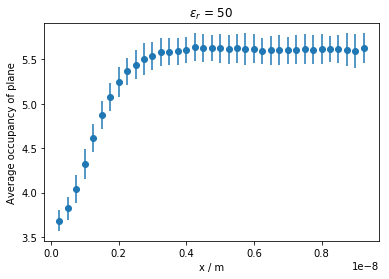

In [36]:
# Read in data for permittivity 50. 

distri = np.zeros((37,150))

s = 0 
for j in range(1,47):
    # Simulations 0, 36 and 42 failed
    if j != 36 and j != 46 and j != 42 and j != 45:
        path = "./simulation_data/07_12_20_S_results/perms_50_75/charges_421/perm_50/calc_{}/average_occupancy.json".format(j)

        distribution_data = format_distribution(path)

        distri[:,2 * j] = distribution_data[38:]
        distri[:,2 * j + 1] = np.flip(distribution_data[:37])
        
        all_421_paths["permittivity_{}".format(50)].append(path)
        
    if j == 45:
        path = "./simulation_data/07_12_20_S_results/perms_50_75/charges_421/perm_50/calc_{}/average_occupancy.json".format(j)

        distribution_data = format_distribution(path)

        distri[:,2 * 36] = distribution_data[38:]
        distri[:,2 * 36 + 1] = np.flip(distribution_data[:37])
        
        all_421_paths["permittivity_{}".format(50)].append(path)
       
    if j == 46:
        path = "./simulation_data/07_12_20_S_results/perms_50_75/charges_421/perm_50/calc_{}/average_occupancy.json".format(j)

        distribution_data = format_distribution(path)

        distri[:,2 * 42] = distribution_data[38:]
        distri[:,2 * 42 + 1] = np.flip(distribution_data[:37])
        
        all_421_paths["permittivity_{}".format(50)].append(path)
        
for j in range(31):

    path = "./simulation_data/23_03_21/charges_421/perm_50/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri[:,88 + 2 * j] = distribution_data[38:]
    distri[:,88 + 2 * j + 1] = np.flip(distribution_data[:37])

    all_421_paths["permittivity_{}".format(50)].append(path)
        

# There is no calc 0 so remove first two "distributions" which are empty
distri = np.delete(distri, 0,1)
distri = np.delete(distri, 0,1)

distributions = np.mean(distri, axis = 1 )

all_421_distributions[:,10] = distributions

err = np.zeros(37)

for k in range(37):
    err[k] = np.std(distri[k,:])  

all_421_errors_se[:,10] = err / np.sqrt(148)
all_421_errors_sd[:,10] = err 

x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions, err, fmt="o") # error bars are standard deviations 
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(50))

# Uncomment the below out if you wish to view all the individual simulations
# for i in range(148):
#     plt.plot(x, distri[:,i], '-')
plt.show()

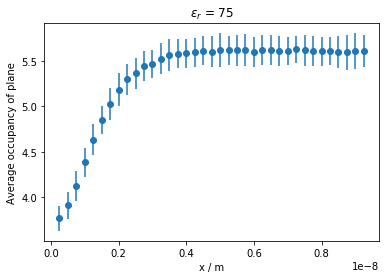

In [37]:
# Read in data for permittivity 75. 

distri = np.zeros((37,150))

for j in range(50):
    path = "./simulation_data/07_12_20_S_results/perms_50_75/charges_421/perm_75/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri[:,2 * j] = distribution_data[38:]
    distri[:,2 * j + 1] = np.flip(distribution_data[:37])
    
    all_421_paths["permittivity_{}".format(75)].append(path)
    
for j in range(25):

        path = "./simulation_data/23_03_21/charges_421/perm_50/calc_{}/average_occupancy.json".format(j)

        distribution_data = format_distribution(path)

        distri[:,100+ + 2 * j] = distribution_data[38:]
        distri[:,100 + 2 * j + 1] = np.flip(distribution_data[:37])
        
        all_421_paths["permittivity_{}".format(75)].append(path)


distributions = np.mean(distri, axis = 1 )

all_421_distributions[:,11] = distributions

err = np.zeros(37)

for k in range(37):
    err[k] = np.std(distri[k,:])  

all_421_errors_se[:,11] = err / np.sqrt(150)
all_421_errors_sd[:,11] = err 


x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions, err, fmt="o")
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(75))

# Uncomment the below out if you wish to view all the individual simulations
# for i in range(150):
#     plt.plot(x, distri[:,i], '-')
    
plt.show()

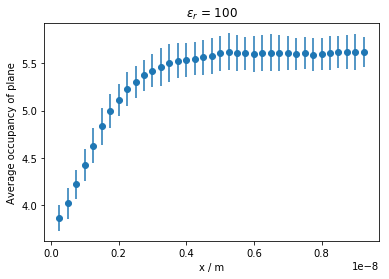

In [38]:
# Read in data for permittivity 100. 

distri = np.zeros((37,160))

for j in range(80):
    path = "./simulation_data/07_12_20_S_results/perm_100/charges_421/perm_100/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri[:,2 * j] = distribution_data[38:]
    distri[:,2 * j + 1] = np.flip(distribution_data[:37])
    
    all_421_paths["permittivity_{}".format(100)].append(path)


distributions = np.mean(distri, axis = 1 )

all_421_distributions[:,12] = distributions

err = np.zeros(37)

for k in range(37):
    err[k] = np.std(distri[k,:])  

all_421_errors_se[:,12] = err / np.sqrt(160)
all_421_errors_sd[:,12] = err 


x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions, err, fmt="o") # error bars are standard deviations 
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(100))

# Uncomment the below out if you wish to view all the individual simulations
# for i in range(160):
#     plt.plot(x, distri[:,i], '-')
    
plt.show()

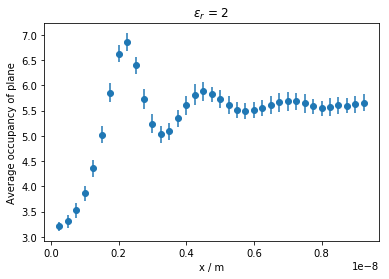

In [39]:
distri = np.zeros((37,60))

for j in range(30):
    path = "./simulation_data/13_01_21/charges_421/perm_2/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri[:,2 * j] = distribution_data[38:]
    distri[:,2 * j + 1] = np.flip(distribution_data[:37])
    
    all_421_paths["permittivity_{}".format(2)].append(path)



distributions = np.mean(distri, axis = 1 )

all_421_distributions[:,13] = distributions

err = np.zeros(37)

for k in range(37):
    err[k] = np.std(distri[k,:])  

all_421_errors_se[:,13] = err / np.sqrt(60)
all_421_errors_sd[:,13] = err 


x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions, err, fmt="o") # error bars are standard deviations 
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(2))

# Uncomment the below out if you wish to view all the individual simulations
# for i in range(60):
#     plt.plot(x, distri[:,i], '-')
    
plt.show()

In [40]:
for i in [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 50, 75, 100, 2]:
    print(len(all_421_paths["permittivity_{}".format(i)]))

30
30
30
50
50
50
70
50
50
50
75
75
80
30


In [41]:
with open("421_charges_paths.json", 'w') as data:
    json.dump(all_421_paths, data)

In [42]:
# Create json containing distributions and errors

permittivities = [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 50, 75, 100, 2]

data_dictionary = {}

for i in range(14):
    data_dictionary["distribution_{}".format(permittivities[i])] = list(all_421_distributions[:,i])
    data_dictionary["standard_deviations_{}".format(permittivities[i])] = list(all_421_errors_sd[:,i])
    data_dictionary["standard_errors_{}".format(permittivities[i])] = list(all_421_errors_se[:,i])

### Create json for systems with 2109 charges

In [43]:
all_2109_distributions = np.zeros((37,14))

all_2109_errors_se = np.zeros((37,14))

all_2109_errors_sd = np.zeros((37,14))

In [44]:
all_2109_paths = {}

for p in [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 50, 75, 100, 2]:
    all_2109_paths["permittivity_{}".format(p)] = []

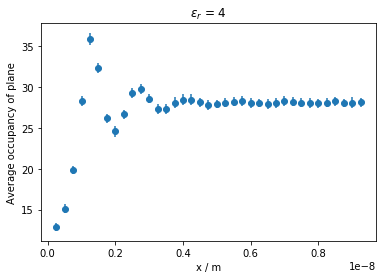

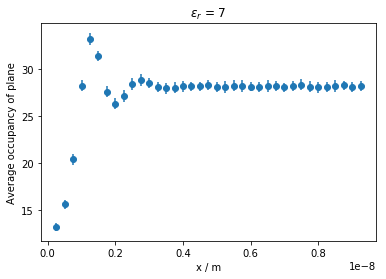

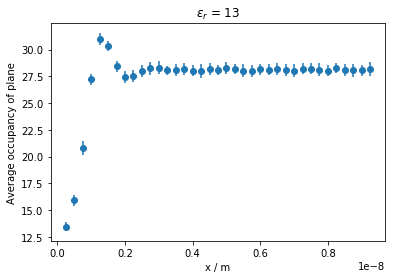

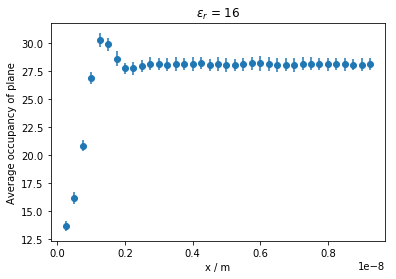

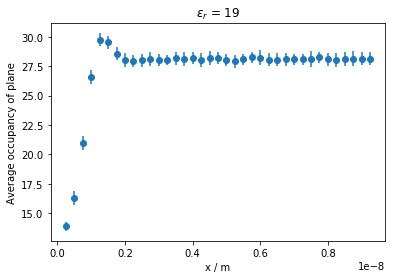

In [45]:
# Read in data for permittivities 4, 7,  13, 16, and 19. 

for h, g in enumerate([4,7,13,16,19]):
    distri = np.zeros((37,60))

    for j in range(30):
        path = "./simulation_data/28_01_21/charges_2109/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,2 * j] = distribution_data[38:]
        distri[:,2 * j + 1] = np.flip(distribution_data[:37])
        
        all_2109_paths["permittivity_{}".format(g)].append(path)


    i = [1,2,4,5,6]
    
    distributions = np.mean(distri, axis = 1 )
    
    all_2109_distributions[:,i[h]] = distributions

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distri[k,:])  
        
    all_2109_errors_se[:,i[h]] = err / np.sqrt(60)
    all_2109_errors_sd[:,i[h]] = err 


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distributions, err, fmt="o")
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(g))
    
    # Uncomment the below out if you wish to view all the individual simulations
#     for i in range(60):
#         plt.plot(x, distri[:,i], '-')
    plt.show()


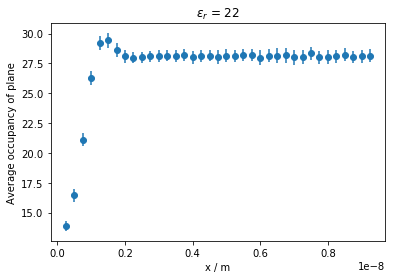

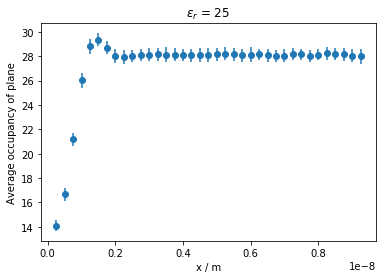

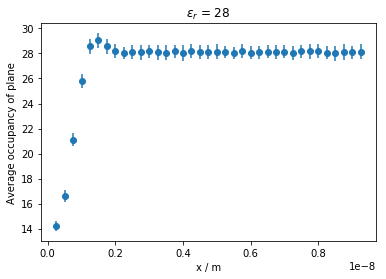

In [46]:
# Read in data for permittivities 22, 25, and 28. 

for h, g in enumerate([22,25,28]):
    distri = np.zeros((37,60))

    for j in range(30):
        path = "./simulation_data/29_01_21/charges_2109/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,2 * j] = distribution_data[38:]
        distri[:,2 * j + 1] = np.flip(distribution_data[:37])
        
        all_2109_paths["permittivity_{}".format(g)].append(path)


    i = [7,8,9]
    
    distributions = np.mean(distri, axis = 1 )
    
    all_2109_distributions[:,i[h]] = distributions

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distri[k,:])  
        
    all_2109_errors_se[:,i[h]] = err / np.sqrt(60)
    all_2109_errors_sd[:,i[h]] = err 


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distributions, err, fmt="o") # error bars are standard deviations 
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(g))
    
    # Uncomment the below out if you wish to view all the individual simulations
#     for i in range(60):
#         plt.plot(x, distri[:,i], '-')

    plt.show()


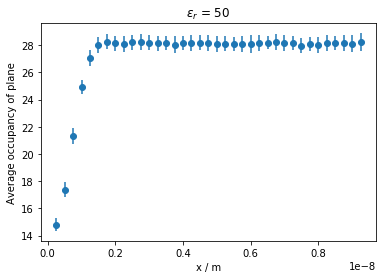

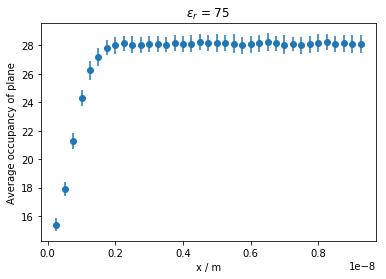

In [47]:
# Read in data for permittivities 50 and 75. 

for h, g in enumerate([50,75]):
    distri = np.zeros((37,100))

    for j in range(50):
        path = "./simulation_data/30_01_21/charges_2109/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        distribution_data = format_distribution(path)

        distri[:,2 * j] = distribution_data[38:]
        distri[:,2 * j + 1] = np.flip(distribution_data[:37])
        
        all_2109_paths["permittivity_{}".format(g)].append(path)


    i = [10,11]
    
    distributions = np.mean(distri, axis = 1 )
    
    all_2109_distributions[:,i[h]] = distributions

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distri[k,:])  
        
    all_2109_errors_se[:,i[h]] = err / np.sqrt(100)
    all_2109_errors_sd[:,i[h]] = err 


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distributions, err, fmt="o")
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(g))
    
    # Uncomment the below out if you wish to view all the individual simulations
#     for i in range(100):
#         plt.plot(x, distri[:,i], '-')
        
    plt.show()


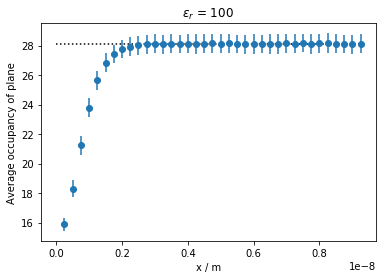

In [48]:
# Read in data for permittivity 100. 

distri_100 = np.zeros((37,654))

for j in range(20):
    path = "./simulation_data/17_01_21/charges_2109/perm_100/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri_100[:,2 * j] = distribution_data[38:]
    distri_100[:,2 * j + 1] = np.flip(distribution_data[:37])
    
    all_2109_paths["permittivity_{}".format(100)].append(path)

    
for j in range(30):
    path = "./simulation_data/18_01_21/charges_2109/perm_100/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri_100[:,40+2 * j] = distribution_data[38:]
    distri_100[:,40+2 * j + 1] = np.flip(distribution_data[:37])
    
    all_2109_paths["permittivity_{}".format(100)].append(path)

    
for j in range(30):
    path = "./simulation_data/19_01_21/charges_2109/perm_100/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri_100[:,100+2 * j] = distribution_data[38:]
    distri_100[:,100+2 * j + 1] = np.flip(distribution_data[:37])
    
    all_2109_paths["permittivity_{}".format(100)].append(path)
    
for j in range(21):
    path = "./simulation_data/04_02_21/charges_2109/perm_100/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri_100[:,160+2 * j] = distribution_data[38:]
    distri_100[:,160+2 * j + 1] = np.flip(distribution_data[:37])
    all_2109_paths["permittivity_{}".format(100)].append(path)

    
for j in range(22,50):
    path = "./simulation_data/04_02_21/charges_2109/perm_100/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri_100[:,202+2 * (j-22)] = distribution_data[38:]
    distri_100[:,202+2 * (j-22) + 1] = np.flip(distribution_data[:37])
    
    all_2109_paths["permittivity_{}".format(100)].append(path)

    
for j in range(50):
    path = "./simulation_data/05_02_21/charges_2109/perm_100/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri_100[:,258+2 * j] = distribution_data[38:]
    distri_100[:,258+2 * j + 1] = np.flip(distribution_data[:37])
    
    all_2109_paths["permittivity_{}".format(100)].append(path)

    
for j in range(51,100):
    path = "./simulation_data/05_02_21/charges_2109/perm_100/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri_100[:,358+2 * (j-51)] = distribution_data[38:]
    distri_100[:,358+2 * (j-51) + 1] = np.flip(distribution_data[:37])
    
    all_2109_paths["permittivity_{}".format(100)].append(path)


    
for j in range(50):
    path = "./simulation_data/07_02_21/charges_2109/perm_100/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri_100[:,456+2 * (j)] = distribution_data[38:]
    distri_100[:,456+2 * (j) + 1] = np.flip(distribution_data[:37])
    
    all_2109_paths["permittivity_{}".format(100)].append(path)


    
for j in range(51,100):
    path = "./simulation_data/07_02_21/charges_2109/perm_100/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri_100[:,556+2 * (j-51)] = distribution_data[38:]
    distri_100[:,556+2 * (j-51) + 1] = np.flip(distribution_data[:37])
    
    all_2109_paths["permittivity_{}".format(100)].append(path)

    
distributions_100 = np.mean(distri_100, axis = 1 )

err_100 = np.zeros(37)

for k in range(37):
    err_100[k] = np.std(distri_100[k,:])  
    
    
all_2109_distributions[:,12] = distributions_100
all_2109_errors_se[:,12] = err / np.sqrt(654)
all_2109_errors_sd[:,12] = err 



x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions_100, err_100, fmt="o") # error bars are standard deviations
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(100))
plt.hlines( 2109 / 75,0, 37*2.5e-10, linestyles = "dotted")

# Uncomment the below out if you wish to view all the individual simulations
# for i in range(654):
#     plt.plot(x, distri_100[:,i], '-')
    
plt.show()


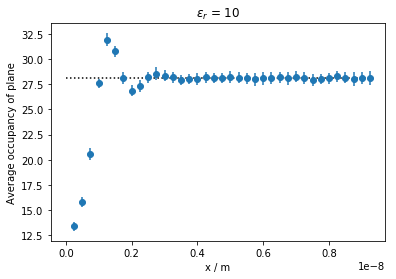

In [49]:
# Read in data for permittivity 10. 

distri_10 = np.zeros((37,60))

for j in range(30):
    path = "./simulation_data/21_01_21/charges_2109/perm_10/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri_10[:,2 * j] = distribution_data[38:]
    distri_10[:,2 * j + 1] = np.flip(distribution_data[:37])
    
    all_2109_paths["permittivity_{}".format(10)].append(path)


    
distributions_10 = np.mean(distri_10, axis = 1 )

err_10 = np.zeros(37)

for k in range(37):
    err_10[k] = np.std(distri_10[k,:])  

x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions_10, err_10, fmt="o ") # error bars are standard deviations
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(10))
plt.hlines( 2109 / 75,0, 37*2.5e-10, linestyles = "dotted")

# Uncomment the below out if you wish to view all the individual simulations
# for i in range(60):
#     plt.plot(x, distri_10[:,i], '-')
    
plt.show()

all_2109_distributions[:,3] = distributions_10

all_2109_errors_se[:,3] = err_10 / np.sqrt(60)
all_2109_errors_sd[:,3] = err_10 

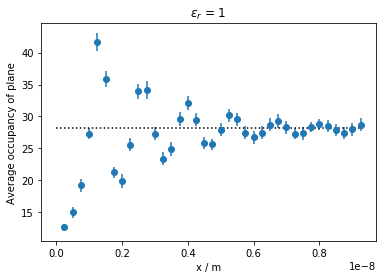

In [50]:
distri_1 = np.zeros((37,60))

for j in range(30):
    path = "./simulation_data/20_01_21/charges_2109/perm_1/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri_1[:,2 * j] = distribution_data[38:]
    distri_1[:,2 * j + 1] = np.flip(distribution_data[:37])
    
    all_2109_paths["permittivity_{}".format(1)].append(path)

    
distributions_1 = np.mean(distri_1, axis = 1 )

err_1 = np.zeros(37)

for k in range(37):
    err_1[k] = np.std(distri_1[k,:])  


x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions_1, err_1, fmt="o") # error bars are standard deviations
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(1))
plt.hlines( 2109 / 75,0, 37*2.5e-10, linestyles = "dotted")

# Uncomment the below out if you wish to view all the individual simulations
# for i in range(60):
#     plt.plot(x, distri_1[:,i], '-')
plt.show()

all_2109_distributions[:,0] = distributions_1

all_2109_errors_se[:,0] = err_1 / np.sqrt(60)
all_2109_errors_sd[:,0] = err_1 

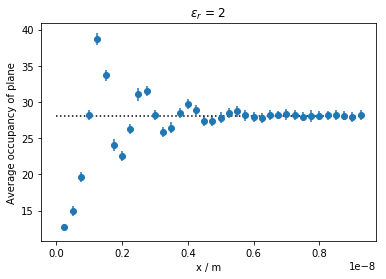

In [51]:
distri = np.zeros((37,60))

for j in range(30):
    path = "./simulation_data/23_02_21/charges_2109/perm_2/calc_{}/average_occupancy.json".format(j)

    distribution_data = format_distribution(path)

    distri[:,2 * j] = distribution_data[38:]
    distri[:,2 * j + 1] = np.flip(distribution_data[:37])
    
    all_2109_paths["permittivity_{}".format(2)].append(path)
    

    
distributions = np.mean(distri, axis = 1 )

err = np.zeros(37)

for k in range(37):
    err[k] = np.std(distri[k,:])  


x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions , err , fmt="o") # error bars are standard deviations 
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(2))
plt.hlines( 2109 / 75,0, 37*2.5e-10, linestyles = "dotted")

# Uncomment the below out if you wish to view all the individual simulations
# for i in range(58):
#     plt.plot(x, distri[:,i], '-')
plt.show()

all_2109_distributions[:,13] = distributions

all_2109_errors_se[:,13] = err / np.sqrt(60)
all_2109_errors_sd[:,13] = err 

In [52]:
for i in [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 50, 75, 100, 2]:
    print(len(all_2109_paths["permittivity_{}".format(i)]))

30
30
30
30
30
30
30
30
30
30
50
50
327
30


In [53]:
with open("2109_charges_paths.json", 'w') as data:
    json.dump(all_2109_paths, data)

In [ ]:
# Create json containing distributions and errors

permittivities = [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 50, 75, 100, 2]

data_dictionary = {}

for i in range(14):
    data_dictionary["distribution_{}".format(permittivities[i])] = list(all_2109_distributions[:,i])
    data_dictionary["standard_deviations_{}".format(permittivities[i])] = list(all_2109_errors_sd[:,i])
    data_dictionary["standard_errors_{}".format(permittivities[i])] = list(all_2109_errors_se[:,i])
    print(np.max(all_105_errors_se[:,i]), permittivities[i], 105)
    print(np.max(all_210_errors_se[:,i]), permittivities[i], 210)
    print(np.max(all_421_errors_se[:,i]), permittivities[i], 421)
    print(np.max(all_2109_errors_se[:,i]), permittivities[i], 2109)
    
# with open('2109_charges_distributions_errors.json', 'w') as outfile:
#     json.dump(data_dictionary, outfile)

In [ ]:
charges = [105, 210, 421]
perms_16 = [1,4,7,10,13,16]
perm_28 = [19,22,25,28]

for c in [105,210]:
    for p in perms_16:
        for calc in range(10):
            path1 = "./27_11_20/charges_{}/perm_{}/calc_{}/average_occupancy_mean.json".format(c,p,calc)
            path2 = "./27_11_20/charges_{}/perm_{}/calc_{}/average_occupancy.json".format(c,p,calc)
            path3 = "./27_11_20/charges_{}/perm_{}/calc_{}/average_occupancy_second.json".format(c,p,calc)

            with open(path2) as json_file:
                data1 = json.load(json_file)

            # Get the average_occupancy data
            distribution_data_1 = np.array(data1['average_occupancy'])

            # Read data
            with open(path3) as json_file:
                    data2 = json.load(json_file)

            # Get the average_occupancy data
            distribution_data_2 = np.array(data2['average_occupancy'])

            average_distribution_data = 0.5*(distribution_data_1 + distribution_data_2)

            with open(path1) as json_file:
                    data = json.load(json_file)

            # Get the average_occupancy data
            distribution_data = np.array(data['average_occupancy'])

            print(np.max(distribution_data - average_distribution_data))
            
for c in [105,210]:
    for p in perm_28:
        for calc in range(10):
            path1 = "./07_12_20/charges_{}/perm_{}/calc_{}/average_occupancy_mean.json".format(c,p,calc)
            path2 = "./07_12_20/charges_{}/perm_{}/calc_{}/average_occupancy.json".format(c,p,calc)
            path3 = "./07_12_20/charges_{}/perm_{}/calc_{}/average_occupancy_first.json".format(c,p,calc)

            with open(path2) as json_file:
                data1 = json.load(json_file)

            # Get the average_occupancy data
            distribution_data_1 = np.array(data1['average_occupancy'])

            # Read data
            with open(path3) as json_file:
                    data2 = json.load(json_file)

            # Get the average_occupancy data
            distribution_data_2 = np.array(data2['average_occupancy'])

            average_distribution_data = 0.5*(distribution_data_1 + distribution_data_2)

            with open(path1) as json_file:
                    data = json.load(json_file)

            # Get the average_occupancy data
            distribution_data = np.array(data['average_occupancy'])

            print(np.max(distribution_data - average_distribution_data))
            
for c in [421]:
    for p in perms_16:
        for calc in range(10):
            path1 = "./07_12_20/charges_{}/perm_{}/calc_{}/average_occupancy_mean.json".format(c,p,calc)
            path2 = "./07_12_20/charges_{}/perm_{}/calc_{}/average_occupancy.json".format(c,p,calc)
            path3 = "./07_12_20/charges_{}/perm_{}/calc_{}/average_occupancy_first.json".format(c,p,calc)

            with open(path2) as json_file:
                data1 = json.load(json_file)

            # Get the average_occupancy data
            distribution_data_1 = np.array(data1['average_occupancy'])

            # Read data
            with open(path3) as json_file:
                    data2 = json.load(json_file)

            # Get the average_occupancy data
            distribution_data_2 = np.array(data2['average_occupancy'])

            average_distribution_data = 0.5*(distribution_data_1 + distribution_data_2)

            with open(path1) as json_file:
                    data = json.load(json_file)

            # Get the average_occupancy data
            distribution_data = np.array(data['average_occupancy'])

            print(np.max(distribution_data - average_distribution_data))
            
            
for c in [421]:
    for p in perm_28:
        for calc in range(10):
            path1 = "./07_12_20/charges_{}/perm_{}/calc_{}/average_occupancy_mean.json".format(c,p,calc)
            path2 = "./07_12_20/charges_{}/perm_{}/calc_{}/average_occupancy.json".format(c,p,calc)
            path3 = "./07_12_20/charges_{}/perm_{}/calc_{}/average_occupancy_first.json".format(c,p,calc)

            with open(path2) as json_file:
                data1 = json.load(json_file)

            # Get the average_occupancy data
            distribution_data_1 = np.array(data1['average_occupancy'])

            # Read data
            with open(path3) as json_file:
                    data2 = json.load(json_file)

            # Get the average_occupancy data
            distribution_data_2 = np.array(data2['average_occupancy'])

            average_distribution_data = 0.5*(distribution_data_1 + distribution_data_2)

            with open(path1) as json_file:
                    data = json.load(json_file)

            # Get the average_occupancy data
            distribution_data = np.array(data['average_occupancy'])

            print(np.max(distribution_data - average_distribution_data))

for c in [421]:
    for p in perms_16:
        for calc in range(10):
            path1 = "./27_11_20_S/charges_{}/perm_{}/calc_{}/average_occupancy_mean.json".format(c,p,calc)
            path2 = "./27_11_20_S/charges_{}/perm_{}/calc_{}/average_occupancy.json".format(c,p,calc)
            path3 = "./27_11_20_S/charges_{}/perm_{}/calc_{}/average_occupancy_first.json".format(c,p,calc)

            with open(path2) as json_file:
                data1 = json.load(json_file)

            # Get the average_occupancy data
            distribution_data_1 = np.array(data1['average_occupancy'])

            # Read data
            with open(path3) as json_file:
                    data2 = json.load(json_file)

            # Get the average_occupancy data
            distribution_data_2 = np.array(data2['average_occupancy'])

            average_distribution_data = 0.5*(distribution_data_1 + distribution_data_2)

            with open(path1) as json_file:
                    data = json.load(json_file)

            # Get the average_occupancy data
            distribution_data = np.array(data['average_occupancy'])

            print(np.max(distribution_data - average_distribution_data))
            
for c in [421]:
    for p in perm_28:
        for calc in range(10):
            path1 = "./27_11_20_S/charges_{}/perm_{}/calc_{}/average_occupancy_mean.json".format(c,p,calc)
            path2 = "./27_11_20_S/charges_{}/perm_{}/calc_{}/average_occupancy.json".format(c,p,calc)
            path3 = "./27_11_20_S/charges_{}/perm_{}/calc_{}/average_occupancy_first.json".format(c,p,calc)

            with open(path2) as json_file:
                data1 = json.load(json_file)

            # Get the average_occupancy data
            distribution_data_1 = np.array(data1['average_occupancy'])

            # Read data
            with open(path3) as json_file:
                    data2 = json.load(json_file)

            # Get the average_occupancy data
            distribution_data_2 = np.array(data2['average_occupancy'])

            average_distribution_data = 0.5*(distribution_data_1 + distribution_data_2)

            with open(path1) as json_file:
                    data = json.load(json_file)

            # Get the average_occupancy data
            distribution_data = np.array(data['average_occupancy'])

            print(np.max(distribution_data - average_distribution_data))

In [ ]:
for c in [421]:
    for p in perm_28:
        for calc in range(10):
            path1 = "./27_11_20_S/charges_{}/perm_{}/calc_{}/average_occupancy_mean.json".format(c,p,calc)
            path2 = "./27_11_20_S/charges_{}/perm_{}/calc_{}/average_occupancy.json".format(c,p,calc)
            path3 = "./27_11_20_S/charges_{}/perm_{}/calc_{}/average_occupancy_first.json".format(c,p,calc)

            with open(path2) as json_file:
                data1 = json.load(json_file)

            # Get the average_occupancy data
            distribution_data_1 = np.array(data1['average_occupancy'])

            # Read data
            with open(path3) as json_file:
                    data2 = json.load(json_file)

            # Get the average_occupancy data
            distribution_data_2 = np.array(data2['average_occupancy'])

            average_distribution_data = 0.5*(distribution_data_1 + distribution_data_2)

            with open(path1) as json_file:
                    data = json.load(json_file)

            # Get the average_occupancy data
            distribution_data = np.array(data['average_occupancy'])

            print(np.max(distribution_data - average_distribution_data))

In [ ]:
x = np.array(range(4, 38)) * 2.5e-10
len(x)